In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy.stats import ttest_1samp
import seaborn as sns

In [2]:
dataset = pd.read_csv('bank-info.csv')
dataset.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41185,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41186,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41187,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Checking for null values:

In [3]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### No null values were discoverd 

# Check skewness/Outliers
## created a sub dataframe to only check columns with numberic values

In [4]:
subsetData = dataset[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']]
subsetData.head()
subsetData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
from scipy.stats import skew
import seaborn as sns

age
0.7846682380932293


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


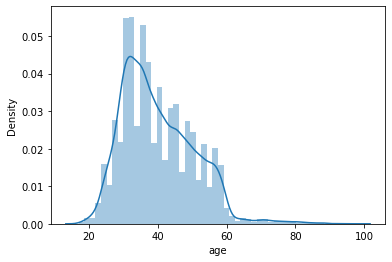

duration
3.2630224157610432


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


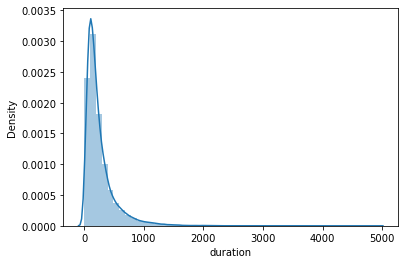

campaign
4.762333252560967


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


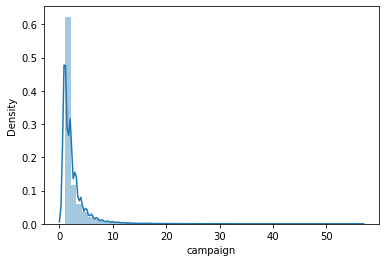

pdays
-4.922010656450046


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


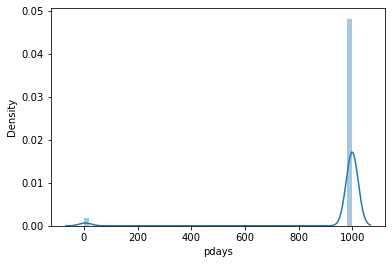

previous
3.8319026847007036


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


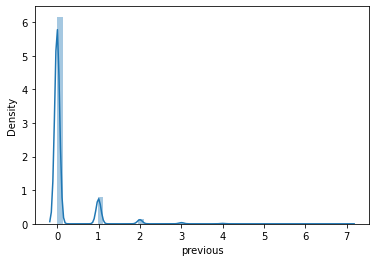

emp.var.rate
-0.7240691785977531


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


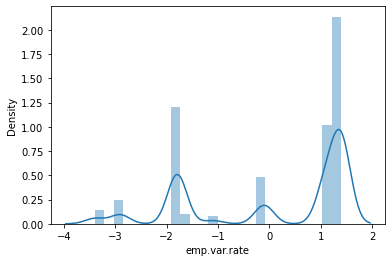

cons.price.idx
-0.23087924271991106


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


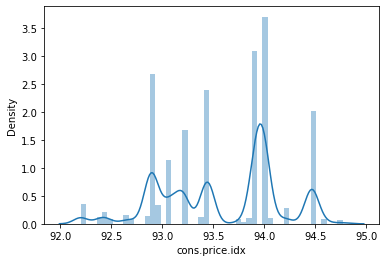

cons.conf.idx
0.30316881731892303


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


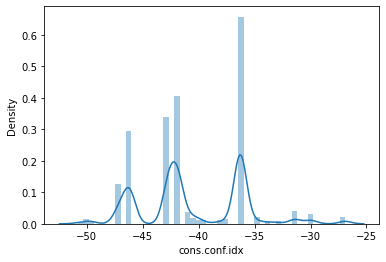

euribor3m
-0.7091621286441164


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


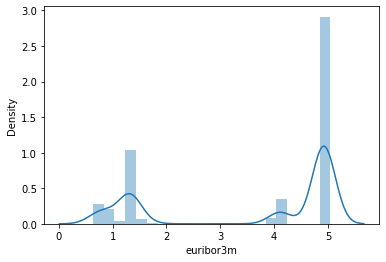

nr.employed
-1.0442243763652301


C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


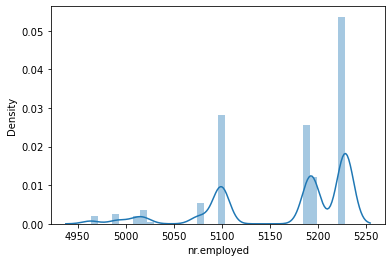

In [6]:
for col in subsetData:
    print(col)
    print(skew(subsetData[col]))
    
    
    plt.figure()
    
    sns.distplot(subsetData[col])
    plt.show()
    

# Dealing with the skewness

In [7]:
sqrAge = np.sqrt(subsetData['age'])

In [8]:
skew(sqrAge)

0.440619036249743

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


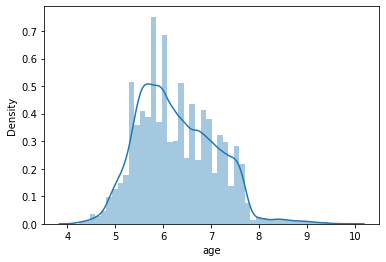

In [9]:
plt.figure()
    
sns.distplot(sqrAge)
plt.show()

In [10]:
sqrAge.mean()

6.275060340376933

In [11]:
sqrAge.median()

6.164414002968976

In [12]:
# The mean and the median are almost equal, thus we now have symmetrical distribution and no more skewness in Age
# Will do that with the rest of the columns

In [13]:
sqrduration = np.sqrt(subsetData['duration'])

In [14]:
skew(sqrduration)

1.1995245640956793

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


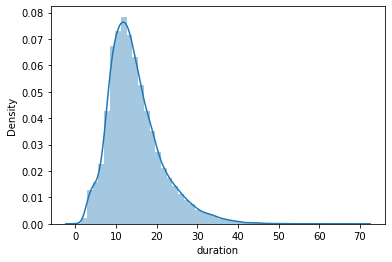

In [15]:
plt.figure()
    
sns.distplot(sqrduration)
plt.show()

In [16]:
sqrcampaign = np.sqrt(subsetData['campaign'])
skew(sqrcampaign)

2.1685028501394124

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


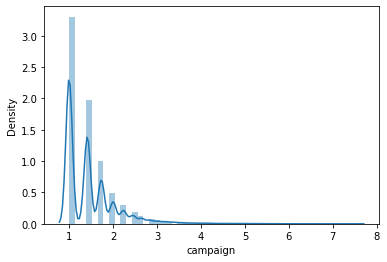

In [17]:
plt.figure()
    
sns.distplot(sqrcampaign)
plt.show()

In [18]:
sqrdays = np.sqrt(subsetData['pdays'])
skew(sqrdays)

-4.927171203655262

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


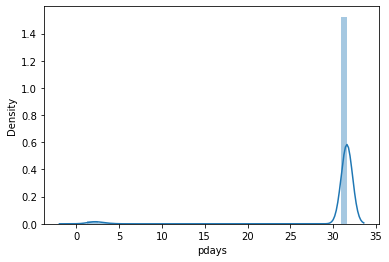

In [19]:
plt.figure()
    
sns.distplot(sqrdays)
plt.show()

In [20]:
sqrprevious = np.sqrt(subsetData['previous'])
skew(sqrprevious)

2.3886653743053796

C:\Users\HP\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


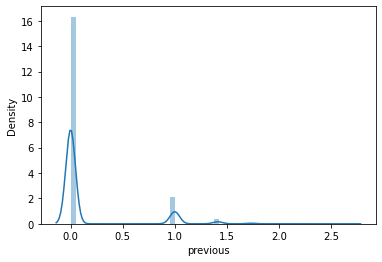

In [21]:
plt.figure()
    
sns.distplot(sqrprevious)
plt.show()

In [22]:
# Create a new data frame with the improved data:

In [23]:
subsetData.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [24]:
improvedData= pd.concat([sqrAge, sqrcampaign, sqrdays, sqrduration, sqrprevious], axis=1)
improvedData.head()

,age,campaign,pdays,duration,previous
0,5.656854,7.483315,31.606961,16.155494,0.0
1,5.656854,6.557439,31.606961,4.000000,0.0
2,7.348469,6.557439,31.606961,8.062258,0.0
3,5.385165,6.480741,31.606961,11.135529,0.0
4,6.633250,6.480741,31.606961,12.124356,0.0


In [25]:
improvedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       41188 non-null  float64
 1   campaign  41188 non-null  float64
 2   pdays     41188 non-null  float64
 3   duration  41188 non-null  float64
 4   previous  41188 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [26]:
dataset['age']= improvedData['age']

In [27]:
dataset['campaign']= improvedData['campaign']
dataset['duration']= improvedData['duration']

In [28]:
dataset['pdays']= improvedData['pdays']

In [29]:
dataset['previous']= improvedData['previous']

In [30]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,5.656854,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,16.155494,7.483315,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
1,5.656854,technician,single,university.degree,no,yes,yes,telephone,jul,wed,4.000000,6.557439,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2,7.348469,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,8.062258,6.557439,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
3,5.385165,technician,married,professional.course,no,yes,no,telephone,may,mon,11.135529,6.480741,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
4,6.633250,retired,married,basic.9y,no,yes,no,telephone,may,fri,12.124356,6.480741,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Now that we've removed the skewness, it's good practice to remove unknown data for the analysis

In [31]:
# The number of 'unknown' data in each column:

In [32]:
(dataset['job'] == 'unknown').sum()

330

In [33]:
(dataset['marital'] == 'unknown').sum()

80

In [34]:
(dataset['education'] == 'unknown').sum()

1731

In [35]:
(dataset['default'] == 'unknown').sum()

8597

In [36]:
(dataset['housing'] == 'unknown').sum()

990

In [37]:
(dataset['loan'] == 'unknown').sum()

990

In [38]:
# removal of unknowns values function
def removal_unknowns(dataset, column):
    col_values = dataset[column].values
    dataset[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return dataset

In [39]:
newData = removal_unknowns(dataset=dataset, column='job')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20747,7.681146,housemaid,married,professional.course,no,no,no,cellular,may,mon,25.980762,1.414214,31.606961,0.000000,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
23444,5.385165,admin.,single,university.degree,no,no,no,cellular,sep,tue,24.494897,1.414214,1.732051,1.732051,success,-1.1,94.199,-37.5,0.880,4963.6,yes
21854,5.830952,admin.,married,university.degree,no,yes,no,cellular,may,thu,17.117243,1.414214,31.606961,1.000000,failure,-1.8,92.893,-46.2,1.266,5099.1,no
36284,5.477226,blue-collar,divorced,high.school,unknown,no,no,cellular,may,wed,29.120440,1.000000,31.606961,1.000000,failure,-1.8,92.893,-46.2,1.334,5099.1,yes
5899,5.567764,admin.,married,university.degree,no,yes,no,telephone,jul,wed,13.892444,2.000000,31.606961,0.000000,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [40]:
newData = removal_unknowns(dataset=dataset, column='marital')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21327,5.656854,admin.,married,high.school,no,yes,no,cellular,may,mon,12.449900,1.414214,31.606961,0.0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
39023,6.164414,admin.,single,university.degree,no,yes,no,cellular,aug,fri,10.770330,1.000000,31.606961,0.0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2,no
39092,8.306624,retired,married,high.school,no,yes,no,cellular,aug,tue,12.288206,1.000000,31.606961,0.0,nonexistent,-2.9,92.201,-31.4,0.883,5076.2,no
5989,7.549834,blue-collar,married,unknown,no,no,no,cellular,jul,tue,11.704700,2.000000,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
25860,7.141428,blue-collar,single,basic.4y,unknown,no,no,telephone,may,fri,21.166010,1.000000,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
newData = removal_unknowns(dataset=dataset, column='education')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
13815,5.567764,admin.,single,university.degree,no,no,no,telephone,may,wed,9.433981,1.414214,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
28156,5.385165,blue-collar,married,basic.9y,no,no,yes,telephone,jun,thu,13.784049,1.000000,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.955,5228.1,no
13306,5.916080,admin.,divorced,high.school,no,yes,no,telephone,may,wed,4.898979,1.414214,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1473,5.830952,entrepreneur,single,professional.course,no,yes,no,telephone,jun,mon,11.661904,2.828427,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
3599,5.567764,services,married,high.school,no,yes,no,telephone,may,wed,10.908712,2.236068,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
newData = removal_unknowns(dataset=dataset, column='default')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32500,7.549834,blue-collar,married,basic.4y,no,yes,no,cellular,aug,wed,10.440307,1.000000,31.606961,0.0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
9773,5.567764,self-employed,married,professional.course,no,no,no,cellular,jul,thu,22.472205,1.732051,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
30068,7.000000,blue-collar,married,basic.9y,no,no,no,cellular,jul,thu,8.426150,1.000000,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
25744,6.855655,blue-collar,married,basic.4y,no,no,no,telephone,may,fri,10.344080,1.000000,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7198,5.291503,student,single,university.degree,no,no,no,cellular,may,tue,11.618950,2.000000,31.606961,0.0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no


In [43]:
newData = removal_unknowns(dataset=dataset, column='housing')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10116,6.244998,admin.,divorced,high.school,no,no,no,telephone,jul,mon,14.491377,1.732051,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
21006,6.000000,technician,single,university.degree,no,no,no,cellular,may,wed,17.521415,1.414214,31.606961,0.0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no
26974,6.000000,blue-collar,single,basic.9y,no,no,no,telephone,jun,wed,19.416488,1.000000,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
5690,5.196152,housemaid,married,basic.9y,no,yes,no,telephone,jun,tue,24.779023,2.000000,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
20552,7.681146,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,11.000000,1.414214,31.606961,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [44]:
newData = removal_unknowns(dataset=dataset, column='loan')
newData.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35770,7.416198,admin.,married,university.degree,no,yes,no,cellular,apr,thu,22.912878,1.000000,31.606961,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
16869,5.099020,blue-collar,single,high.school,no,no,yes,telephone,jul,mon,15.842980,1.414214,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
20650,8.062258,retired,married,university.degree,no,no,no,cellular,apr,wed,11.135529,1.414214,31.606961,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,yes
18001,6.480741,technician,married,professional.course,no,yes,no,cellular,aug,thu,10.392305,1.414214,31.606961,0.0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
35269,6.244998,management,married,university.degree,no,yes,no,cellular,apr,fri,17.492856,1.000000,31.606961,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [45]:
(dataset['marital'] == 'unknown').sum()

0

In [46]:
(dataset['education'] == 'unknown').sum()

0

In [47]:
(dataset['default'] == 'unknown').sum()

0

In [48]:
(dataset['housing'] == 'unknown').sum()

0

In [49]:
(dataset['loan'] == 'unknown').sum()

0

In [50]:
# Changing the column names to make them easier to read

In [51]:
mapping = {dataset.columns[15]:'employment_variation_rate', dataset.columns[16]: 'consumer_price_index', 
           dataset.columns[17]:'consumer_confidence_index', dataset.columns[19]: 'number_of_employees',
           dataset.columns[20]: 'subscribed' }
dataset = dataset.rename(columns=mapping)

In [52]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor3m,number_of_employees,subscribed
31871,5.567764,technician,married,professional.course,no,no,no,cellular,aug,tue,7.141428,1.000000,31.606961,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
38684,5.385165,admin.,single,university.degree,no,yes,no,cellular,jun,wed,13.038405,1.000000,31.606961,0.0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes
9329,5.291503,admin.,single,university.degree,no,no,no,telephone,jul,fri,6.782330,1.732051,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
11673,5.830952,technician,married,professional.course,no,yes,no,cellular,apr,mon,11.045361,1.732051,31.606961,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
1801,7.141428,self-employed,married,basic.4y,no,no,yes,telephone,may,wed,9.539392,2.645751,31.606961,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
5854,6.633250,services,married,high.school,no,no,no,cellular,jul,mon,13.784049,2.000000,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
5689,6.082763,management,married,university.degree,no,no,no,telephone,jun,tue,22.135944,2.000000,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes
2711,6.082763,technician,married,professional.course,no,yes,no,telephone,jul,tue,15.556349,2.449490,31.606961,0.0,nonexistent,1.4,93.918,-42.7,4.955,5228.1,no
36223,6.782330,technician,married,professional.course,no,yes,no,telephone,may,tue,13.892444,1.000000,31.606961,1.0,failure,-1.8,92.893,-46.2,1.344,5099.1,no
1900,5.916080,blue-collar,married,basic.6y,no,no,no,telephone,jun,thu,12.000000,2.645751,31.606961,0.0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
